In [5]:
import pandas as pd
import numpy as np
from core import DataLoader
import warnings

warnings.filterwarnings("ignore")

In [6]:
Christianity = DataLoader('../data/christianity')

In [7]:
Judaism = DataLoader('../data/judaism')

In [8]:
def calculate_years_for_tags(data, tags):
    posts = data._posts_df.set_index('Id')
    post_history = data._postHistory_df.set_index('PostId')
    df = posts.merge(post_history, left_on='Id', right_on='PostId', how='inner', suffixes=('Posts', 'History'))
    posts_with_tags = df[df.Tags.str.contains('|'.join(tags), na=False)]
    posts_with_tags.CreationDate = pd.to_datetime(posts_with_tags.CreationDate)
    result = pd.DataFrame({
        'CreationYear': posts_with_tags.CreationDate.dt.year})
    return result

<AxesSubplot:xlabel='CreationYear'>

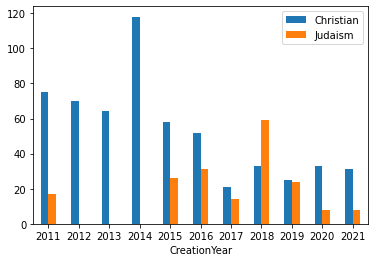

In [10]:
tags = ['<homosexuality>']

chris = calculate_years_for_tags(Christianity, tags)
chris = chris.groupby(['CreationYear'])['CreationYear'].size()

jud = calculate_years_for_tags(Judaism, tags)
jud = jud.groupby(['CreationYear'])['CreationYear'].count()

result = pd.DataFrame({'Christian': chris, 'Judaism': jud})

result.plot.bar(rot=0)

In [127]:
def calculate_countries_for_tags_at_year(data, tags, year, n_countries):
    users = pd.concat([Christianity._users_df, Judaism._users_df], sort=False)
    countries = calculate_countries(users, n_countries)
    print(countries)

    posts = data._posts_df.set_index('OwnerUserId')
    users = data._users_df.set_index('Id')
    df = posts.merge(users, left_on='OwnerUserId', right_on='Id', how='inner', suffixes=('Posts', 'Users'))
    df.CreationDatePosts = pd.to_datetime(df.CreationDatePosts)
    
    posts_with_tags = df[df.Tags.str.contains('|'.join(tags), na=False)
     & df.Location.str.contains('|'.join(countries), na=False)
     & df.CreationDatePosts.dt.year == year]
    result = pd.DataFrame({
        'Country': posts_with_tags.Location})

    return result

In [125]:
def calculate_countries(users, n_countries):
    users = standardize_countries(users)
    users['Number'] = users.groupby(['Location'])['Location'].transform('count')
    users = users.sort_values(by=['Number'], ascending=False)
    countries = pd.DataFrame({
        'Country': users.Location,
        'Number': users.Number
    })
    return countries['Country'][0:n_countries]

In [131]:
def standardize_countries(users):
    aliases = {
        'USA': ['USA', 'US', 'United States'],
        'UK': ['UK', 'United Kingdom', 'GB', 'Great Britain'],
        'Israil': ['Israil', 'Israel'],
        'France': ['France'],
        'Germany': ['Germany'],
        'India': ['India'],
        'Thailand': ['Thai'],
        'Indonesia': ['Indonesia'],
        'Brazil': ['Brazil'],
        'Australia': ['Australia'],
        'Canada': ['Canada'],
        'Poland': ['Poland'],
        'Russia': ['Russia'],
    }
    
    for alias, names in aliases.items():
        for country in names:
            users[users['Location'].str.contains(country, na=False)]['Location'] = alias

    return users
            

29201    United States
21332    United States
2254     United States
8582     United States
5167     United States
630      United States
32780    United States
2245     United States
638      United States
12508    United States
Name: Country, dtype: object
29201    United States
21332    United States
2254     United States
8582     United States
5167     United States
630      United States
32780    United States
2245     United States
638      United States
12508    United States
Name: Country, dtype: object


IndexError: index 0 is out of bounds for axis 0 with size 0

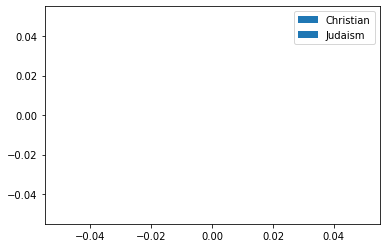

In [132]:
tags = ['<homosexuality>']
n_countries = 10
year = 2018

chris = calculate_countries_for_tags_at_year(Christianity, tags, year, n_countries)
chris = chris.groupby(by=chris.Country).size()

jud = calculate_countries_for_tags_at_year(Judaism, tags, year, n_countries)
jud = jud.groupby(by=jud.Country).size()

result = pd.DataFrame({'Christian': chris, 'Judaism': jud})

result.plot.bar(rot=0)